# Using logistic regression for classification

## Understanding the logistic function
The logistic function is a member of the sigmoid (s-shaped) functions and it is represented by the following formula:

## $$y = \frac{1}{1 + e^-z}$$
with $z = x.\theta^T$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline  

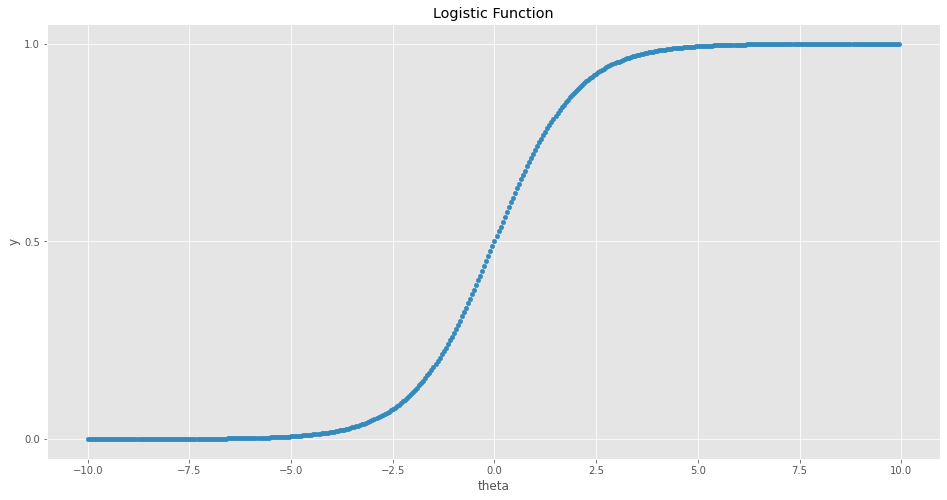

In [2]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

theta = np.arange(-10, 10, 0.05)
y = 1 / (1 + np.exp(-1 * theta))

pd.DataFrame(
    {
        'theta': theta,
        'y': y
    }
).plot(
    title='Logistic Function', 
    kind='scatter', x='theta', y='y', 
    ax=ax
)

ax.set_yticks(np.arange(0, 1.25, step=0.5))

Two key characteristics to notice in the logistic function are as follows:
- y only goes between 0 and 1. It approaches 1 as theta approaches infinity, and approaches 0 as theta approaches negative infinity.
- y takes the value of 0.5 when theta is 0.

## Objective function
During the training phase, the algorithm loops through the data trying to find the coefficients that minimize a predefined objective (loss) function. The **loss function** we try to minimize in the case of logistic regression is called **log loss**. It measures how far the
predicted probabilities (ŷ) are from the actual class labels (y) using the following formula:

$$-log(ŷ) if y $$ $$else -log(1 - ŷ)$$

# Iris Dataset

In [3]:
from sklearn import datasets
iris = datasets.load_iris()

df = pd.DataFrame(
    iris.data,
    columns=iris.feature_names
)

df['target'] = pd.Series(
    iris.target
)

df.sample(n=5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
27,5.2,3.5,1.5,0.2,0
2,4.7,3.2,1.3,0.2,0
111,6.4,2.7,5.3,1.9,2
140,6.7,3.1,5.6,2.4,2
29,4.7,3.2,1.6,0.2,0


In [4]:
df.target.value_counts(normalize=True)

0    0.333333
1    0.333333
2    0.333333
Name: target, dtype: float64

In [5]:
data, target = df.drop(columns=['target']), df.target

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[data.columns] = scaler.fit_transform(data[data.columns])

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data,
    target,
    test_size=.3,
    random_state=0,
)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate


num_folds = 6

clf = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)

accuracy_scores = cross_validate(clf, 
                                 data, 
                                 target, 
                                 cv=num_folds, 
                                 scoring=['accuracy'],
                  )

accuracy_mean = pd.Series(accuracy_scores['test_accuracy']).mean()
accuracy_std = pd.Series(accuracy_scores['test_accuracy']).std()
accuracy_sterror = accuracy_std / np.sqrt(num_folds)

print(
    'Logistic Regression: Accuracy ({}-fold): {:.2f} ~ {:.2f}'.format(
        num_folds,
        (accuracy_mean - 1.96 * accuracy_sterror),
        (accuracy_mean + 1.96 * accuracy_sterror),
    )
)

Logistic Regression: Accuracy (6-fold): 0.93 ~ 0.99
